<h1><b>Tubes B</b></h1>
<h4>Implementasi Backpropagation</h4>

Anggota Kelompok:
- 13520001 - Fayza Nadia
- 13520014 - Muhammad Helmi Hibatullah
- 13520026 - Muhammad Fajar Ramadhan
- 13520029 - Muhammad Garebaldhie Er Rahman

# Models

Model yang dibuat menggunakan format seperti berikut

file `sigmoid.json`
```json
{
  "case": {
    "model": {
      "input_size": 2,
      "layers": [
        {
          "number_of_neurons": 3,
          "activation_function": "sigmoid"
        }
      ]
    },
    "input": [
      [0.0, 0.0],
      [0.0, 0.1]
    ],
    "initial_weights": [
      [
        [0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6],
        [0.9, 0.1, 0.2]
      ]
    ],
    "target": [
      [0.1, 1.0],
      [1.0, 0.0]
    ],
    "learning_parameters": {
      "learning_rate": 0.1,
      "batch_size": 2,
      "max_iteration": 1,
      "error_threshold": 0.1
    }
  },
  "expect": {
    "stopped_by": "max_iteration",
    "final_weights": [
      [
        [0.1, 2.86, 0.17],
        [0.5, -2.46, 0.41],
        [0.9, 0.0, -1.76]
      ]
    ]
  }
}
```

1. `model`: Terdiri dari ukuran input yang diterima dan input layer yang berisi jumlah neuron serta fungsi aktivasi (linear, relu, sigmoid, softmax).

2. `input`: Menyatakan input yang terdiri dari 2 dimensi.
- dimensi 1 merupakan vektor ke-i.
- dimensi 2 merupakan isi suatu vektor.

3. `initial_weights`: Menyatakan inisiasi bobot pada awal.
- dimensi 1 bersesuaian dengan layers
- dimensi 2 berukuran banyak neuron pada layer sebelumnya + 1 dengan layer pertama adalah ukuran input + 1 serta baris pertama merupakan bias.
- dimensi 3 berukuran banyak neuron pada layer yang bersesuaian.

4. `target`: Menyatakan hasil output dari backpropagation.
- dimensi 1 berukuran sama dengan dimensi 1 pada input.
- dimensi 2 berukuran sama dengan banyak neuron pada layer terakhir.

5. `learning_parameters`: Parameter yang terdiri dari learning rate, batch size, max iteration, dan error threshold.

6. `stopped_by`: Berisi 2 nilai valid, yaitu max iteration atau error threshold, sebagai penentu terminasi.

7. `final_weights`: Bobot akhir yang digunakan untuk pengecekan setelah seluruh iterasi dijalankan.

#### Installing Dependencies 

In [1]:
%pip install numpy pandas graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: c:\python\python.exe -m pip install --upgrade pip


<h3><b>Class & Function</b></h3>

<b>Import</b>

In [4]:
import math
import numpy as np
import json
import os
from graphviz import Digraph
from typing import List, Dict

<b>Activation</b>

Class Activation adalah kelas yang berisi fungsi-fungsi aktivasi yang digunakan pada neural network. Fungsi-fungsi tersebut adalah linear, relu, sigmoid, dan softmax.

In [3]:
class Activation:
    LINEAR = "linear"
    RELU = "relu"
    SIGMOID = "sigmoid"
    SOFTMAX = "softmax"

    def __init__(self, mode) -> None:
        self.mode = mode

    def __linear_calculate(self, res):
        return res

    def __linear_derivative(self, res):
        return np.ones(np.shape(res))

    def __sigmoid_calculate(self, res):
        res = np.array([(1 / (1 + pow(math.e, -x))) for x in res])
        return res

    def __sigmoid_derivative(self, res):
        return res * (1 - res)

    def __relu_calculate(self, res):
        res[res < 0] = 0
        return res

    def __relu_derivative(self, res):
        res[res <= 0] = 0
        res[res > 0] = 1
        return res

    def __softmax_calculate(self, res):
        numerator = np.array([pow(math.e, x) for x in res])
        denominator = np.array([np.sum(pow(math.e, x)) for x in res])
        result = np.empty(numerator.shape)

        for index, ele in enumerate(numerator):
            result[index] = ele / denominator[index]

        return result

    def __softmax_derivative(self, res, target=[]):
        """ 
        if t == 1 then -(1-o) -> o - 1
        """
        subtract = np.subtract(res, target)
        return np.array(subtract)

        return res

    def calculate(self, x, w, b):
        res = np.matmul(x, w)
        res = np.add(res, b)
        if self.mode == Activation.LINEAR:
            return self.__linear_calculate(res)
        elif self.mode == Activation.RELU:
            return self.__relu_calculate(res)
        elif self.mode == Activation.SIGMOID:
            return self.__sigmoid_calculate(res)
        elif self.mode == Activation.SOFTMAX:
            return self.__softmax_calculate(res)
        else:
            raise Exception(
                "Mode is not implemented, please select correct mode")

    def derivative(self, res, target=[]):
        if self.mode == Activation.LINEAR:
            return self.__linear_derivative(res)
        elif self.mode == Activation.RELU:
            return self.__relu_derivative(res)
        elif self.mode == Activation.SIGMOID:
            return self.__sigmoid_derivative(res)
        elif self.mode == Activation.SOFTMAX:
            return self.__softmax_derivative(res, target)
        else:
            raise Exception(
                "Mode is not implemented, please select correct mode")

    def predict(self, res):
        if self.mode == Activation.LINEAR:
            return res
        elif self.mode == Activation.RELU:
            return res
        elif self.mode == Activation.SIGMOID:
            return res
        elif self.mode == Activation.SOFTMAX:
            return res
        else:
            raise Exception(
                "Mode is not implemented, please select correct mode")

<b>Reader</b>

Class Reader adalah kelas yang berfungsi untuk membaca berkas json yang berisi model FFNN.

In [5]:
ACTIVATION_LIST = [Activation.LINEAR, Activation.RELU,
                   Activation.SIGMOID, Activation.SOFTMAX]

MAX_SSE = 1e-8
BASE_FFNN_PATH = "test/test_case_ffnn/"
BASE_BACKPROP_PATH = "test/test_case_backprop/"


class Reader:
    def __init__(self) -> None:
        pass

    @staticmethod
    def read_ffnn(filename: str) -> Dict:
        """ 
        Read ffnn models from json
        """
        try:
            with open(BASE_FFNN_PATH + filename, "rb") as f:
                json_file = json.load(f)
                # Return models
                if validate_data(json_file):
                    return json_file
                return None
        except OSError as e:
            print("File not found")
            os._exit(-1)

    @staticmethod
    def read_backprop(filename: str) -> Dict:
        """ 
        Read json file for backprogation test case
        """
        try:
            with open(BASE_BACKPROP_PATH + filename, "rb") as f:
                json_file = json.load(f)
                raw_model = json_file["case"]
                transformed_model = transform_to_ffnn_model(raw_model)
                expected = json_file["expect"]

                return raw_model, transformed_model, expected

        except OSError as e:
            print("File not found")
            os._exit(-1)


def transform_to_ffnn_model(input_model: dict):
    """ 
    Needed to trasnsform to the current FFNN model
    """
    model = {}
    model["layers"] = len(input_model["model"]["layers"]) + 1
    model["activation_functions"] = [x["activation_function"]
                                     for x in input_model["model"]["layers"]]
    model["neurons"] = [input_model["model"]["input_size"]] + [x["number_of_neurons"]
                                                               for x in input_model["model"]["layers"]]
    model["weights"] = [np.transpose(x)
                        for x in input_model["initial_weights"]]
    model["rows"] = len(input_model["input"])
    model["data"] = input_model["input"]
    model["target"] = input_model["target"]
    model["max_sse"] = MAX_SSE

    return model


def validate_data(json_data) -> bool:
    """ 
    Validate input data .json
    """

    # Validate layers
    layers = json_data['layers']
    activation_functions = np.array(
        json_data['activation_functions'], dtype=np.string_)

    # Neurons are input hidden output
    neurons = np.array(json_data['neurons'], dtype=np.int32)
    weights = json_data['weights']
    rows = json_data['rows']
    data = np.array(json_data['data'], dtype=np.float64)
    data_names = np.array(json_data['data_names'], dtype=np.string_)
    target_names = np.array(json_data['target_names'], dtype=np.string_)
    target = np.array(json_data['target'], dtype=np.int32)
    max_sse = json_data['max_sse']

    if not isinstance(layers, int):
        raise Exception("Layers is not integer")

    # Validate activation function per layers
    if activation_functions.shape[0] != layers - 1:
        raise Exception("Length of activation functions is not the same")

    for function in activation_functions:
        if function.decode() not in ACTIVATION_LIST:
            raise Exception("Invalid activation functions")

    # # Validate neurons
    if neurons.shape[0] != layers:
        raise Exception("Neurons number don't match with layers")

    assert neurons.dtype == np.int32

    # Validate weights, weights must be layers - 1
    if len(weights) != layers - 1:
        raise Exception("Please input correct weights")

    for index, weight_per_neuron in enumerate(weights):
        for weight_neuron in weight_per_neuron:
            if len(weight_neuron) != neurons[index] + 1:
                raise Exception(
                    f"Invalid number of weights parameter in weight {index}")
            np.array(weight_neuron, dtype=np.float64)

    # Validate rows
    if not isinstance(rows, int):
        raise Exception("Rows is not integer")

    # data_names
    len_data_features = data_names.shape[0]
    assert np.issubdtype(data_names.dtype, np.string_) == True

    # data attr
    if data.shape[0] != rows:
        raise Exception("Number of data doesn't match with rows")

    if data.shape[1] != len_data_features:
        raise Exception("Number of data columns doesnt match")

    assert np.issubdtype(target_names.dtype, np.string_) == True
    assert target.shape[0] == rows

    if not isinstance(max_sse, float):
        raise Exception("Please input correct sse")

    return True

<b>FFNN Algorithm</b>

Class FFNN adalah kelas yang berfungsi untuk mengimplementasikan algoritma forward propagation pada FFNN.

In [6]:
class FFNN:
    def __init__(self, model) -> None:
        self.layers = model['layers']
        self.activation_functions = np.array(model['activation_functions'])
        self.neurons = np.array(model['neurons'])
        self.weights = model['weights']
        self.data = np.array(model['data'])
        self.target = np.array(model['target'])
        self.output = None
        self.ouput_per_layer = []
        self.max_sse = model["max_sse"]
        pass

    def __str__(self) -> str:
        return f"\
  Layers: {self.layers}\n\
  Activations: {self.activation_functions}\n\
  Neurons: {self.neurons}\n\
  Weights: {self.weights}\n\
  Data: {self.data}\n\
  target: {self.target}\n\
  max_sse: {self.max_sse}\n"

    # Will return output functions
    def compute(self):
        res = self.data
        for i in range(self.layers - 1):
            activation_function = Activation(
                self.activation_functions[i])
            transposed_weights = np.transpose(np.array(self.weights[i]))
            weights, bias = self.separate_bias(transposed_weights)
            res = activation_function.calculate(res, weights, bias)
            self.ouput_per_layer.append(res)
        self.output = res
        return res

    def get_all_output_layer(self):
        return self.ouput_per_layer

    def separate_bias(self, data):
        bias = data[0, :]
        weight = data[1:, :]
        return weight, bias

    def predict(self):
        A = Activation(self.activation_functions[-1])
        res = A.predict(self.output)
        sse = self._calculate_sse()
        print(f"\
  Data: {self.data}\n\
  Target: {self.target}\n\
  Predictions: {res}\n\
  SSE: {sse}\n\
  isValid: {[s < self.max_sse for s in sse]} ( < {self.max_sse})\n")

    def _calculate_sse(self):
        sse = 0
        for i in range(len(self.output)):
            sse += pow(self.output[i] - self.target[i], 2)
        sse = sse / 2
        return sse

<b>Graph</b>

Class Graph adalah kelas yang berfungsi untuk menggambar grafik dari hasil forward propagation.

In [6]:
class Graph:
    def __init__(self, ffnn: FFNN, filename: str) -> None:
        self.ffnn = ffnn
        self.filename = filename
        self.f = Digraph(
            'G', filename=f'./res/{self.filename}_graph', format='png')

    def draw(self):
        self.f.attr('node', shape='circle')
        self._add_node()
        self._add_edge()
        self.f.view()
        return self.f

    def _add_node(self):
        # Add input nodes
        self.f.node("b1")
        for data_name in self.ffnn.data_names:
            self.f.node(data_name)

        # Add nodes in the next layers
        for layer in range(1, self.ffnn.layers - 1):
            self.f.node(f"b{layer+1}")
            for j in range(self.ffnn.neurons[layer]):
                self.f.node(f"h{layer}{j+1}")

    def _add_edge(self):
        # Add edges between layers
        layers = self.ffnn.layers

        for layer in range(layers - 1):
            transposed_weights = np.transpose(
                np.array(self.ffnn.weights[layer]))
            weights, bias = self.ffnn.separate_bias(transposed_weights)

            # Add edges between bias and hidden layer or output
            for i in range(len(bias)):
                if layers == 2:
                    bias_name = f"b{layer+1}"
                    end = f"y{i+1}"
                else:
                    bias_name = f"b{layer+1}"
                    end = f"h{layer+1}{i+1}"
                    if layer == self.ffnn.layers - 2:
                        end = f"y{i+1}"

                self.f.edge(bias_name, end, label=f"{bias[i]}")

            # Add edges between input and hidden layer or output
            for i in range(self.ffnn.neurons[layer]):
                for j in range(len(weights[i])):
                    if layers == 2:
                        start = self.ffnn.data_names[i]
                        end = f"y{j+1}"
                    elif layer == 0:
                        start = self.ffnn.data_names[i]
                        end = f"h{layer+1}{j+1}"
                    elif layer == self.ffnn.layers - 2:
                        start = f"h{layer}{i+1}"
                        end = f"y{j+1}"
                    else:
                        start = f"h{layer}{i+1}"
                        end = f"h{layer+1}{j+1}"
                    self.f.edge(start, end, label=f"{weights[i][j]}")


<h3><b>Main Program</b></h3>

        FEED FORWARD NEURAL NETWORK
  Data Names: ['x1' 'x2']
  Data: [[3. 1.]]
  Target Names: ['false' 'true']
  Target: [[ 2.   0.3 -1.9]]
  Predictions: [[ 2.   0.3 -1.9]]
  SSE: [0.00000000e+00 3.08148791e-33 0.00000000e+00]
  isValid: [True, True, True] ( < 1e-6)

Graph is saved in folder res with name: linear_graph.png


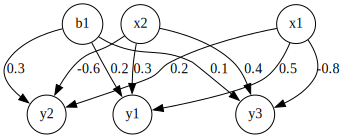

In [7]:
print("=============================================")
print("        FEED FORWARD NEURAL NETWORK")
print("=============================================")
filename = input("Input filename inside test folder: ")

path = "./test/"
model = Reader.read_ffnn(path + filename)

ffnn = FFNN(model=model)
ffnn.compute()
ffnn.predict()

filename = filename.split(".")[0]
graph = Graph(ffnn, filename)

print("=============================================")
print("Graph is saved in folder res with name: " +
      filename + "_graph.png")
print("=============================================")
graph.draw()